In [16]:
import mediapipe as mp    
import json 
import os 
import torchvision.io as io
from tqdm import tqdm
import numpy as np

I0000 00:00:1716286261.981365   21269 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1716286262.018844  105026 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.171.04), renderer: NVIDIA GeForce RTX 4090/PCIe/SSE2
W0000 00:00:1716286262.019104   21269 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1716286262.022153  105030 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1716286262.026857  105033 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  0%|          | 0/11620 [00:00<?, ?it/s]

torch.Size([110, 3, 256, 256])
torch.Size([3, 256, 256])


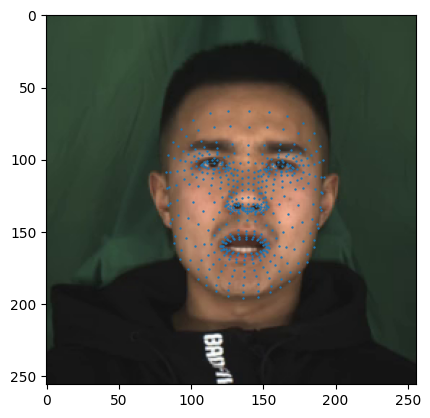

In [93]:
import mediapipe as mp    
import matplotlib.pyplot as plt
import cv2

mp_face_mesh = mp.solutions.face_mesh

BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path="./FaceLandmarker.task"),
    running_mode=VisionRunningMode.IMAGE)

with FaceLandmarker.create_from_options(options) as landmarker:

    input_dir = "../data_crop"
    files = json.load(open(f"../data_crop/datalist.json", "r"))
    for row in tqdm(files):
        out_path = f"{row['video']}".replace("/", "_").replace("video_", "")
        video = io.read_video(f"{input_dir}/{out_path}", pts_unit="sec",output_format="TCHW")[0]
        print(video.shape)
        for frame in video:
            print(frame.shape)
            mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=np.asarray(frame.permute(1,2,0)))
            results = landmarker.detect(mp_image)

            break
        break

def landmarks_to_numpy(results):
  """Converts MediaPipe landmarks to a NumPy matrix.

  Args:
    landmarks: A list of MediaPipe landmark objects.

  Returns:
    A NumPy matrix with dimensions (num_landmarks, dimensions_per_landmark).
  """

  # Determine number of landmarks and dimensions per landmark (usually 3 for x, y, z)
  landmarks = results.face_landmarks[0]

  num_landmarks = len(landmarks)
  dimensions = 2  # Assuming x, y, and potentially z coordinates

  landmark_matrix = np.empty((num_landmarks, dimensions), dtype=np.float32)

  for i, landmark in enumerate(landmarks):
      landmark_matrix[i, 0] = landmark.x
      landmark_matrix[i, 1] = landmark.y
  
  return landmark_matrix

# print(results)
# print(landmarks_to_numpy(results.face_landmarks))
landmarker = landmarks_to_numpy(results)

plt.imshow(frame.permute(1, 2, 0).numpy())
plt.scatter(landmarker[:,0]*256, landmarker[:,1]*256,s=0.5)